#**🎯 1. Əsas anlayışlar**

## 1.1 Qərar Ağacları (Decision Trees)
- **Tərif:** Qərar ağacları, veriləri budaqlara ayıraraq təsnifat və ya reqressiya edən sadə amma güclü modellərdir.  
- **Məntiq:**  
  - Hər düyündə (node) veriləri ən yaxşı ayıran xüsusiyyət seçilir.  
  - Bu ayırma meyarı adətən **Gini impurity** və ya **Entropy** (təsnifat üçün), **MSE** (reqressiya üçün) olur.  
  - Son yarpaq düyünlər (leaf nodes) proqnoz verir: təsnifatda sinif etiketi, reqressiyada isə orta dəyər.  

📌 **Problem:** Qərar ağacları təkbaşına **overfitting** etməyə çox meyllidir. Yəni train setinə çox yaxşı uyğunlaşır amma test setində zəif performans göstərə bilər.

## 1.2 Ensemble Learning (Toplu Öyrənmə)
- **Fikir:** Tək bir güclü model əvəzinə, çoxlu zəif modelləri bir araya gətirərək daha yaxşı proqnoz vermək.  
- İki əsas yanaşma:  
  1. **Bagging (Bootstrap Aggregating)**  
  2. **Boosting**  

📊 Nümunə:  
- Tək bir qərar ağacı səhv edə bilər.  
- Amma yüzlərlə fərqli ağacı bir araya gətirib **çoxluq səsi** alsaq, toplu daha düzgün qərar verər.

## 1.3 Bagging (Bootstrap Aggregating)
- **Bootstrap:** Train verilənlərindən təkrar seçməli (sampling with replacement) kiçik alt nümunələr (bootstrap samples) yaradılır.  
- Hər alt nümunə üzərində ayrıca bir model (məsələn, qərar ağacı) öyrədilir.  
- Proqnoz zamanı:  
  - **Təsnifatda:** çoxluğun səsi (majority voting)  
  - **Reqressiyada:** orta (averaging) götürülür.  

🎯 Məqsəd: Variansı azaltmaq, overfitting-in qarşısını almaq.  

## 1.4 Random Forest’in Fikri
Random Forest, **Bagging + Təsadüfi Xüsusiyyət Seçimi** birləşməsidir.  

- Bagging sayəsində: Hər ağac fərqli bootstrap nümunəsi ilə öyrədilir.  
- Təsadüfilik sayəsində: Hər düyündə ən yaxşı xüsusiyyəti seçərkən, bütün xüsusiyyətlərə deyil **təsadüfi seçilmiş bir alt çoxluğa** baxılır.  
- Bunun sayəsində: Ağaclar bir-birindən asılı olmayaraq müxtəlif olur → ensemble daha güclü olur.

## 1.5 Random Forest’ın Məqsədi
- Tək qərar ağacı = yüksək varians  
- Bagging ilə → varians azalır  
- Təsadüfi xüsusiyyət seçimi ilə → ağaclar arasında korrelyasiya azalır  
- Nəticə: Daha ümumi, güclü və balanslı bir model

## 1.6 Formula (Ensemble Proqnozu)

### Təsnifat üçün:
$$
\hat{y} = \text{mode}\{h_1(x), h_2(x), ..., h_T(x)\}
$$

### Reqressiya üçün:
$$
\hat{y} = \frac{1}{T} \sum_{t=1}^T h_t(x)
$$

Burada:  
- $h_t(x)$ = t-ci qərar ağacının proqnozu  
- $T$ = ümumi ağac sayı

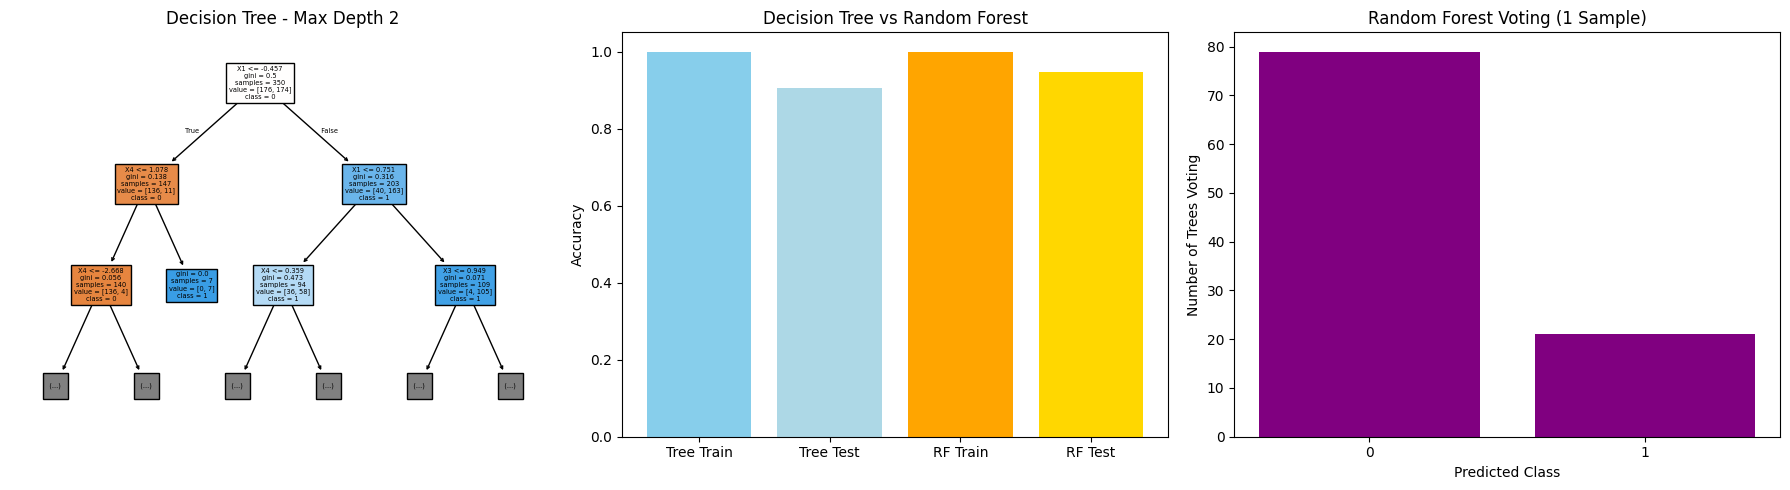

#**📘 2. Teorik Təməllər**

Random Forest-ı dərindən başa düşmək üçün əvvəlcə onun həll etdiyi problemləri və arxasındakı nəzəri prinsipləri öyrənmək lazımdır.

## 2.1 Qərar Ağaclarının Zəif Tərəfləri

Qərar ağacları sadə və intuitiv modellərdir, amma bəzi ciddi çatışmazlıqları var:  

- **Overfitting:**  
  - Ağac çox dərin böyüyəndə təlim setinə demək olar ki, tam uyğunlaşır.  
  - Nəticədə test setində zəif performans göstərir.  

- **Yüksək Varians:**  
  - Kiçik dəyişikliklər verilənlərdə böyük fərqli ağacların yaranmasına səbəb olur.  
  - Bu, modelin sabitliyini azaldır.  

- **Həddindən artıq spesifik qaydalar:**  
  - Tək bir ağac real həyatda mürəkkəb nümunələri düzgün ümumiləşdirə bilmir.  

📌 Yəni qərar ağacları "çox öyrənən" amma "yaxşı ümumiləşdirə bilməyən" modellərdir.

## 2.2 Random Forest bu problemləri necə həll edir?

Random Forest qərar ağaclarının zəif tərəflərini "ensemble" yanaşması ilə yumşaldır:  

- **Overfitting-i azaldır:**  
  - Tək bir ağacda overfitting ola bilər, amma çoxlu ağacın ortalaması/çoxluq səsi daha sabit nəticə verir.  

- **Variansı azaldır:**  
  - Hər ağac fərqli bootstrap veriləri ilə qurulur → müxtəliflik yaranır.  
  - Bu müxtəliflik nəticələri sabitləşdirir.  

- **Ümumiləşdirməni yaxşılaşdırır:**  
  - Fərqli ağacların qərarları birləşdirilir → daha balanslı model alınır.  

🎯 Nəticə: Random Forest həm daha **dəqiq**, həm də **sabit** proqnoz verir.  

## 2.3 Xüsusiyyət Seçimində Təsadüfilik (Feature Randomness)

Random Forest yalnız **bootstrap nümunələri** ilə kifayətlənmir, əlavə olaraq təsadüfilik də əlavə edir:  

- Hər düyündə ən yaxşı xüsusiyyəti seçərkən **bütün xüsusiyyətlər yox**, təsadüfi seçilmiş bir alt çoxluq nəzərdən keçirilir.  
- Bu yanaşma:  
  - Ağaclar arasında **korrelyasiyanı azaldır** (yəni eyni xüsusiyyətlər üzərində qalmırlar).  
  - Daha **müxtəlif** ağaclar yaranır.  
  - Ensemble nəticəsi daha güclü olur.  

📌 Misal: Əgər datasetdə 100 xüsusiyyət varsa, hər düyündə məsələn cəmi 10-u nəzərə alınır.

## 2.4 Bootstrap Sampling Məntiqi

**Bootstrap sampling** Random Forest-ın əsas sütunlarından biridir.  

- Train setinin ölçüsü $N$ olsun.  
- Bootstrap nümunəsi də yenə $N$ elementdən ibarət olur, amma **təkrar seçməklə** (with replacement).  
- Bu o deməkdir ki:  
  - Bəzi nümunələr bir neçə dəfə daxil ola bilər.  
  - Bəzi nümunələr isə heç seçilməyə bilər.  

Bu xüsusiyyətin nəticəsi:  
- Təxminən train setinin **63%-i** hər bootstrap nümunəsində yer alır.  
- Qalan təxminən **37%-i** isə həmin ağacda istifadə olunmur. Bu "istifadə olunmayan verilənlər" **Out-of-Bag (OOB) samples** adlanır.  

🎯 OOB nümunələri modelin əlavə test dəsti kimi istifadə olunur → bu da **daxili validasiya** imkanı yaradır.

## 2.5 Teorik Gözlənti

- Tək bir qərar ağacının **bias-ı aşağı**, amma **variansı yüksəkdir**.  
- Random Forest isə çoxlu ağacın ortalamasını götürdüyü üçün:  
  - **Bias bir qədər artır**, amma bu, ciddi problem yaratmır.  
  - **Varians isə ciddi şəkildə azalır** → model daha sabit olur.  

---

📌 **Qısa xülasə:**  
Random Forest = **Qərar Ağaclarının sadəliyi** + **Bagging-in sabitliyi** + **Təsadüfilikdən gələn müxtəliflik**.


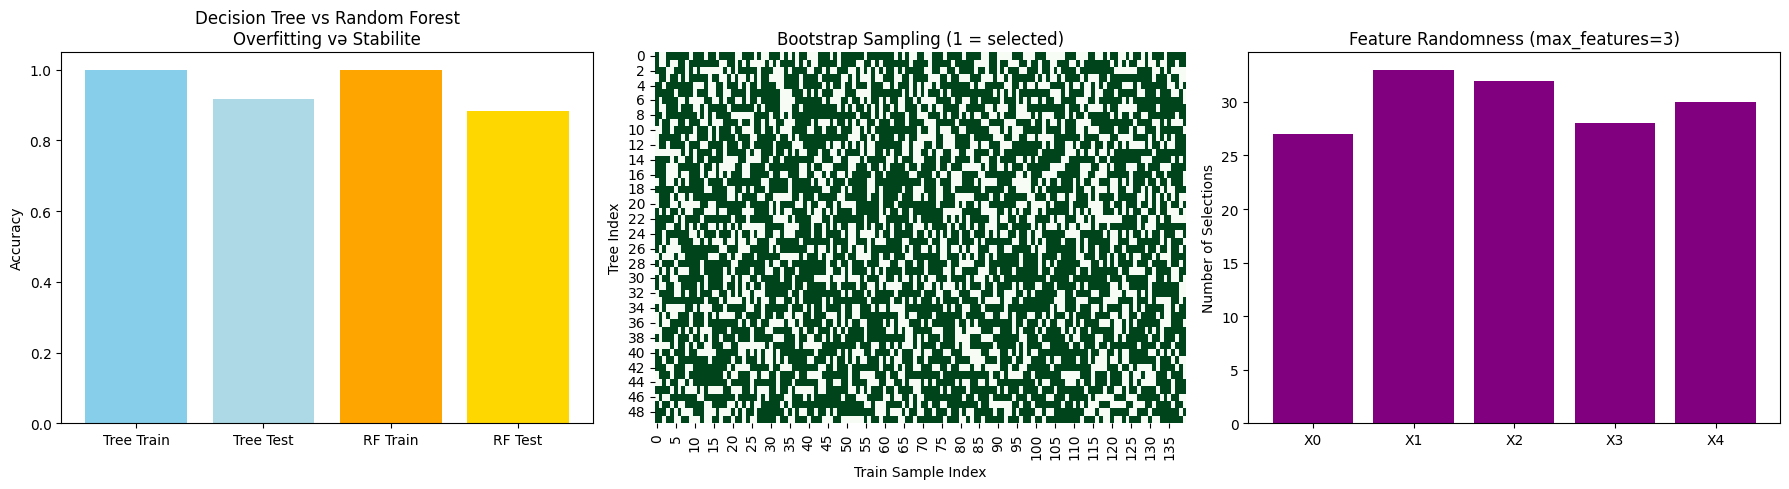

#**🌲 3. Random Forest’in Quruluşu**

Random Forest bir neçə sadə addım üzərində qurulur. Bu addımların hər birini başa düşmək modeli anlamaqda çox vacibdir.

## 3.1 Ağacların Qurulması (Bootstrapping)

- Train setindən **bootstrap nümunələri** yaradılır.  
- Hər bootstrap nümunəsi ilkin datasetin ölçüsünə bərabərdir, amma **təkrar seçməklə** formalaşdırılır.  
- Hər bir bootstrap nümunəsi üzərində ayrıca bir **qərar ağacı** qurulur.  

📌 Nəticədə:  
- Hər ağac fərqli verilər üzərində öyrədilir.  
- Ağaclar arasında müxtəliflik artır.

## 3.2 Bölünmə Kriteriyaları (Splitting Criteria)

Qərar ağaclarında düyünlərdə budaqlanma (split) edərkən **ən yaxşı xüsusiyyəti** seçmək lazımdır.  
Random Forest da bu prinsiplərdən istifadə edir:  

- **Təsnifat üçün:**
  - **Gini Index**  
  - **Entropy (Information Gain)**  

- **Reqressiya üçün:**  
  - **MSE (Mean Squared Error)**  

📊 Məntiq:  
- Hər bir xüsusiyyət yoxlanır.  
- Ən çox "təmiz" ayırmanı verən xüsusiyyət seçilir.  
- "Təmizlik" → siniflərin daha homogen olması deməkdir.

## 3.3 Hər Düyündə Təsadüfi Xüsusiyyət Seçimi (max_features)

Random Forest-ın əsas yeniliklərindən biri:  

- Hər düyündə bütün xüsusiyyətlər yox, yalnız **təsadüfi seçilmiş bir alt çoxluq** nəzərdən keçirilir.  
- Bu alt çoxluq **`max_features`** parametrinə görə təyin olunur.  

Məsələn:  
- Datasetdə 100 xüsusiyyət varsa,  
- `max_features = sqrt(100) = 10` seçilsə,  
- Hər düyündə yalnız 10 təsadüfi xüsusiyyət yoxlanacaq.  

🎯 Məqsəd:  
- Ağacların çox bənzər olmasının qarşısını almaq.  
- Daha çox müxtəliflik yaratmaq.

## 3.4 Final Proqnozun Əldə Edilməsi

Bütün ağaclar qurulduqdan sonra, yeni bir nümunə üçün proqnoz aşağıdakı kimi alınır:  

- **Təsnifat (Classification):**  
  - Hər ağac səs verir (sinif seçir).  
  - Ən çox səs alan sinif **final proqnoz** olur.  
  - Bu üsula **majority voting** (çoxluq səsi) deyilir.  

- **Reqressiya (Regression):**  
  - Hər ağac bir ədədi proqnoz verir.  
  - Bütün proqnozların **ortalaması** final nəticə olur.  

📌 Formula şəklində:  

**Təsnifat üçün:** $
\hat{y} = \text{mode}\{h_1(x), h_2(x), ..., h_T(x)\}
$

**Reqressiya üçün:**   $
\hat{y} = \frac{1}{T} \sum_{t=1}^T h_t(x)
$

Burada:  
- $h_t(x)$ = t-ci ağacın proqnozu  
- $T$ = ümumi ağac sayı  

---

📌 **Xülasə:**  
1. Bootstrap nümunələri yaradılır.  
2. Hər bootstrap nümunəsində qərar ağacı qurulur.  
3. Hər düyündə təsadüfi xüsusiyyət dəsti yoxlanır.  
4. Final proqnoz çoxluq səsi və ya orta götürülməklə hesablanır.  


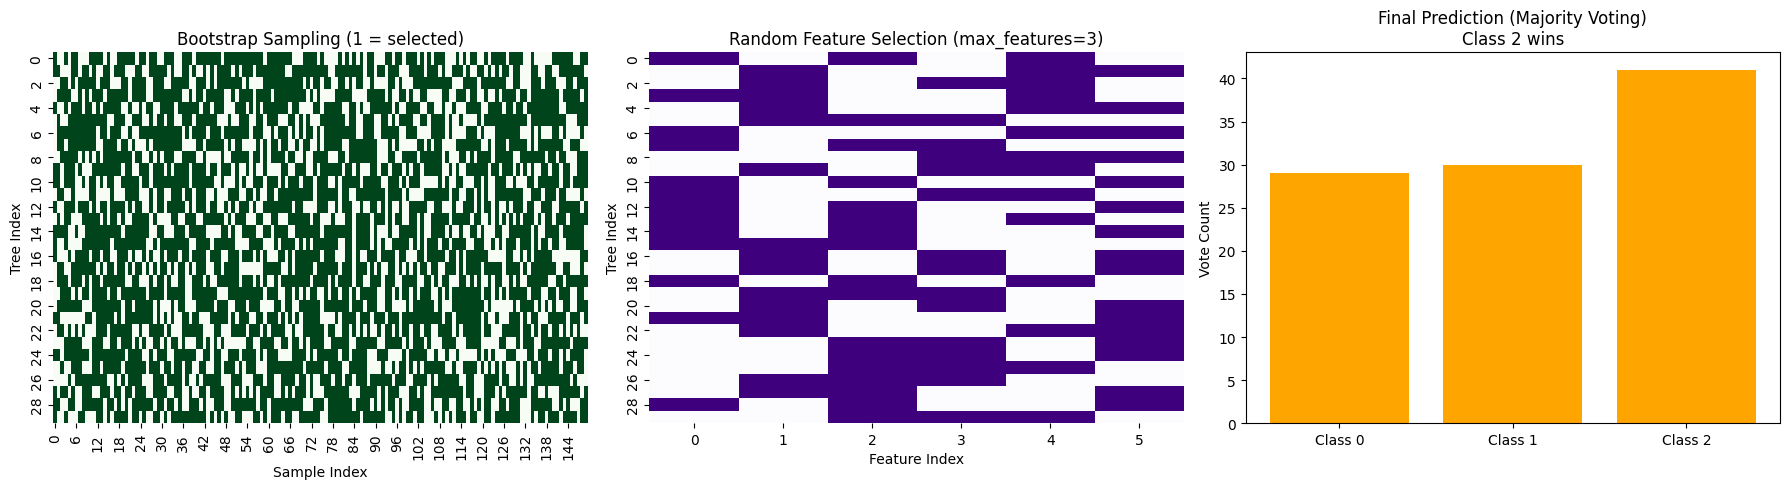

#**⚙️ 4. Hiperparametrlər**

Random Forest modellərində hiperparametrlər modelin mürəkkəbliyini, öyrənmə qabiliyyətini və ümumi performansını idarə edir.  
Bu parametrlərin düzgün seçilməsi modelin **dəqiqliyinə**, **hesablama sürətinə** və **ümumiləşdirmə qabiliyyətinə** birbaşa təsir göstərir.

## 4.1 `n_estimators` (Ağac sayı)

- **Tərif:** Random Forest-da qurulan ağacların ümumi sayı.  
- **Təsiri:**  
  - Ağac sayı artdıqca model daha sabit olur.  
  - Amma çox böyük olduqda hesablamalar yavaşlayır.  
- **Tipik seçimlər:** 100, 200, 500, hətta 1000.  
- 📌 Qızıl qayda: çox ağac → daha dəqiq nəticə, amma daha uzun `train` müddəti.

## 4.2 `max_depth` (Maksimum Dərinlik)

- **Tərif:** Hər bir ağacın böyüyə biləcəyi maksimum dərinlik.  
- **Təsiri:**  
  - Böyük dərinlik → ağac çox mürəkkəbləşir → **overfitting** riski.  
  - Kiçik dərinlik → model sadələşir → **underfitting** ola bilər.  
- **Tipik seçim:**  
  - Adətən ya təyin olunmur (None → ağac tam böyüyür),  
  - ya da dataset ölçüsünə görə məhdudlaşdırılır (məsələn 10, 20).

## 4.3 `min_samples_split`

- **Tərif:** Bir düyünün daha kiçik budaqlara bölünməsi üçün tələb olunan minimum nümunə sayı.  
- **Təsiri:**  
  - Kiçik dəyər → çox budaqlanma → yüksək mürəkkəblik.  
  - Böyük dəyər → daha az budaqlanma → sadə model.  
- **Tipik seçim:** Default = 2 (yəni ən azı 2 nümunə olanda bölünə bilər).

## 4.4 `min_samples_leaf`

- **Tərif:** Yarpaq düyündə olmalı olan minimum nümunə sayı.  
- **Təsiri:**  
  - Kiçik dəyər (məs. 1) → çox xırda yarpaqlar → overfitting.  
  - Böyük dəyər → yarpaqlar ümumiləşmiş olur → daha sabit nəticə.  
- **Tipik seçimlər:** 1, 5, 10.

## 4.5 `max_features`

- **Tərif:** Hər düyündə parçalanma zamanı baxılan maksimum xüsusiyyət sayı.  
- **Təsiri:**  
  - Kiçik dəyər → ağaclar daha müxtəlif olur.  
  - Böyük dəyər → ağaclar daha bənzər olur.  
- **Tipik seçimlər:**  
  - `sqrt` → təsnifat üçün çox istifadə olunur.  
  - `log2` və ya sabit say da seçilə bilər.  

## 4.6 `bootstrap`

- **Tərif:** Ağacların qurulması üçün bootstrap nümunələrinin istifadə olunub-olunmaması.  
- **Variantlar:**  
  - `True` (default) → bootstrap istifadə olunur.  
  - `False` → bütün datasetdən istifadə olunur.  
- 📌 Əksər hallarda **True** daha yaxşı nəticə verir, çünki müxtəliflik artır.

## 4.7 `random_state`

- **Tərif:** Təsadüfilik üçün başlanğıc seed.  
- **Məqsəd:**  
  - Eyni nəticəni hər dəfə təkrarlamaq üçün istifadə olunur.  
- 📌 Əgər reproducibility (təkrarlana bilən nəticə) istənilirsə, bu dəyər təyin olunmalıdır.

## 4.8 `class_weight`

- **Tərif:** Təsnifat problemlərində siniflərin çəkisini tənzimləyir.  
- **Məqsəd:**  
  - Disbalanced datasetlərdə (məsələn, 95% sinif A, 5% sinif B) balans yaratmaq.  
- **Variantlar:**  
  - `balanced` → çəkilər avtomatik olaraq siniflərin tezliyinə görə tənzimlənir.  
  - Manual çəkilər də verilə bilər (məsələn, `{0: 1, 1: 5}`).  


📌 **Xülasə:**  
- `n_estimators`, `max_depth`, `max_features` modelin mürəkkəbliyini və sabitliyini idarə edir.  
- `min_samples_split`, `min_samples_leaf` ağacların nə qədər incə detallar öyrənəcəyini təyin edir.  
- `bootstrap` və `random_state` modeli necə quracağımızı müəyyən edir.  
- `class_weight` isə disbalanced verilənlərdə çox vacibdir.  

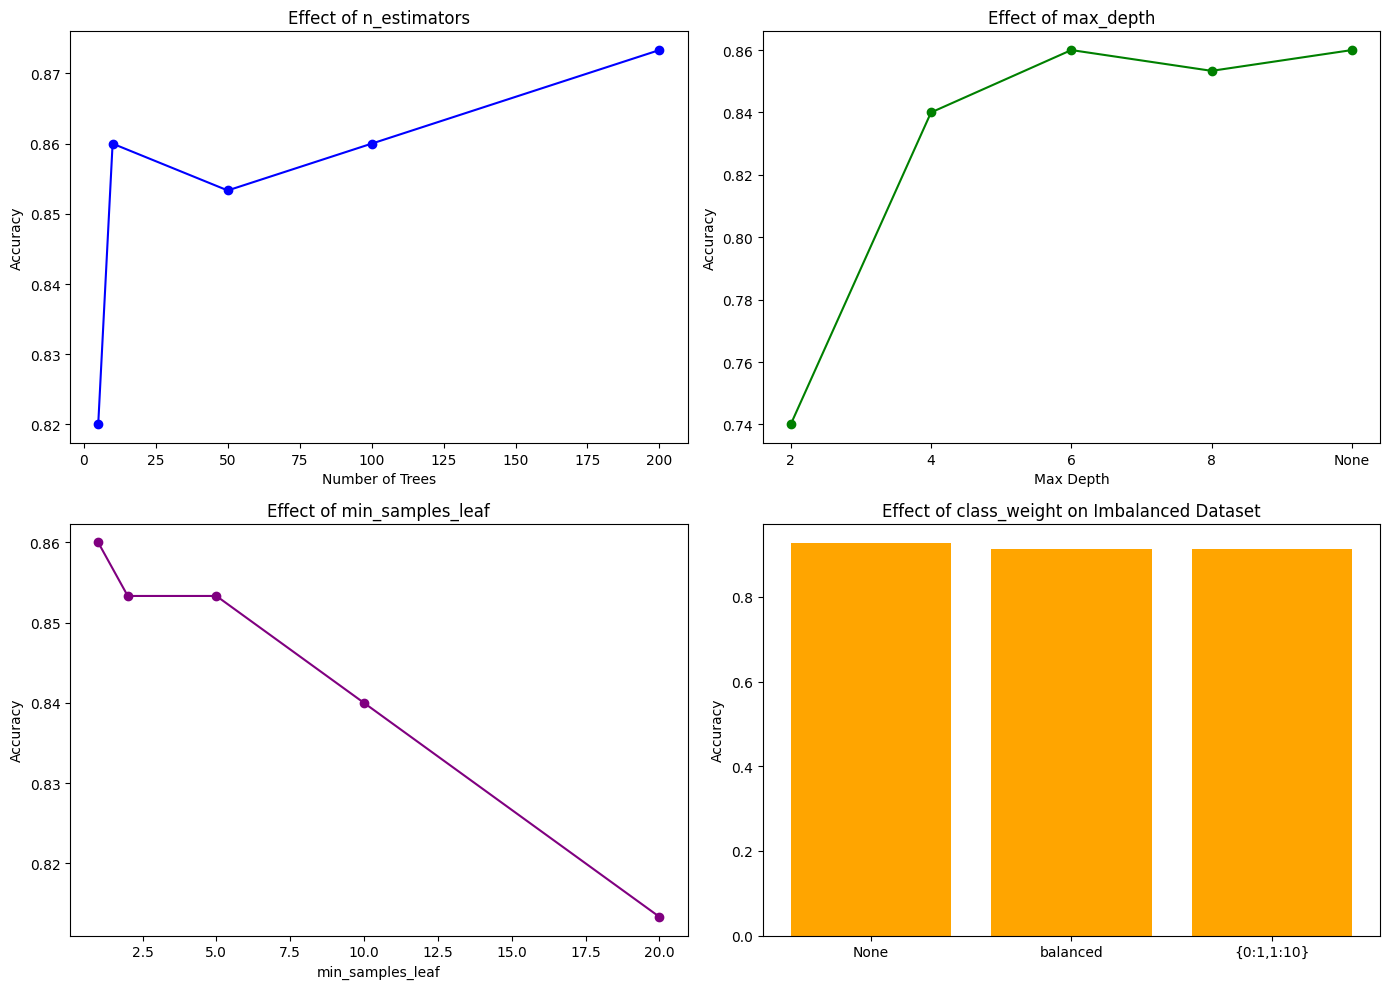

#**📊 5. Performans Ölçüləri**

Random Forest modelini qiymətləndirmək üçün müxtəlif performans ölçüləri istifadə olunur.  
Bunlar modelin **dəqiqliyini**, **təhlükəsizliyini** və **ümumiləşdirmə qabiliyyətini** obyektiv şəkildə yoxlamağa imkan verir.  


## 5.1 Təsnifat üçün Əsas Ölçülər

### Doğruluq (Accuracy)
- **Tərif:** Doğru proqnozların ümumi proqnozlara nisbəti.  
$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$
- Sadə və intuitivdir, amma disbalanced datasetlərdə yanıldıcı ola bilər.  


### Precision (Dəqiqlik)
- **Tərif:** Modelin "pozitiv" dediyi nümunələrin nə qədərinin həqiqətən pozitiv olduğunu göstərir.  
$$
Precision = \frac{TP}{TP + FP}
$$
- **Sual:** Modelin verdiyi pozitiv proqnozlara nə qədər güvənə bilərəm?  



### Recall (Həssaslıq, Sensitivity)
- **Tərif:** Həqiqi pozitivlərin nə qədərini model düzgün tapa bilir.  
$$
Recall = \frac{TP}{TP + FN}
$$
- **Sual:** Həqiqətən pozitiv olanları model nə qədər tapa bilir?  


### F1-Score
- **Tərif:** Precision və Recall-un harmonik ortası.  
$$
F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}
$$
- Balanslı ölçü → həm dəqiqliyi, həm də həssaslığı nəzərə alır.  

📌 Əsasən disbalanced datasetlərdə Accuracy əvəzinə **F1-score** daha faydalıdır.  

## 5.2 ROC – AUC Əyrisi

- **ROC (Receiver Operating Characteristic) əyrisi:**  
  - X oxu: False Positive Rate (FPR)  
  - Y oxu: True Positive Rate (TPR, yəni Recall)  

- **AUC (Area Under Curve):**  
  - ROC əyrisinin altında qalan sahə.  
  - Modelin təsnifat gücünü ölçür.  

📌 AUC dəyəri:  
- 0.5 → təsadüfi seçim qədərdir.  
- 1.0 → ideal modeldir.

## 5.3 Reqressiya üçün Əsas Ölçülər

### MSE (Mean Squared Error)
$$
MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$
- Outlierləri daha çox cəzalandırır.  

### RMSE (Root Mean Squared Error)
$$
RMSE = \sqrt{MSE}
$$
- Eyni vahiddə olduğundan interpretasiya asandır.  

### MAE (Mean Absolute Error)
$$
MAE = \frac{1}{n} \sum_{i=1}^n |y_i - \hat{y}_i|
$$
- Səhvlərin ortalama böyüklüyünü ölçür, outlierləri MSE qədər şişirtmir.  

### R² (Determination Coefficient)
$$
R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
$$
- Modelin variasiyanı nə qədər açıqladığını göstərir.  
- 1 → ideal model, 0 → heç nə açıqlamır.

## 5.4 Out-of-Bag (OOB) Error

Random Forest-a məxsus xüsusi qiymətləndirmə üsulu.  

- Hər ağac **bootstrap nümunəsi** ilə qurulur.  
- Bu nümunəyə daxil olmayan təxminən **37% verilər** həmin ağac üçün **OOB nümunələri** adlanır.  
- Model bu OOB nümunələri ilə test edilir.  

📌 Üstünlüklər:  
- Əlavə cross-validation lazım olmadan **daxili doğrulama** imkanı verir.  
- Vaxt və hesablama resurslarına qənaət edir.  


📌 **Xülasə:**  
- Təsnifatda → Accuracy, Precision, Recall, F1, ROC-AUC vacibdir.  
- Reqressiyada → MSE, RMSE, MAE, R² istifadə olunur.  
- Random Forest-ın özəlliyi → **OOB error** daxili qiymətləndirmə imkanıdır.


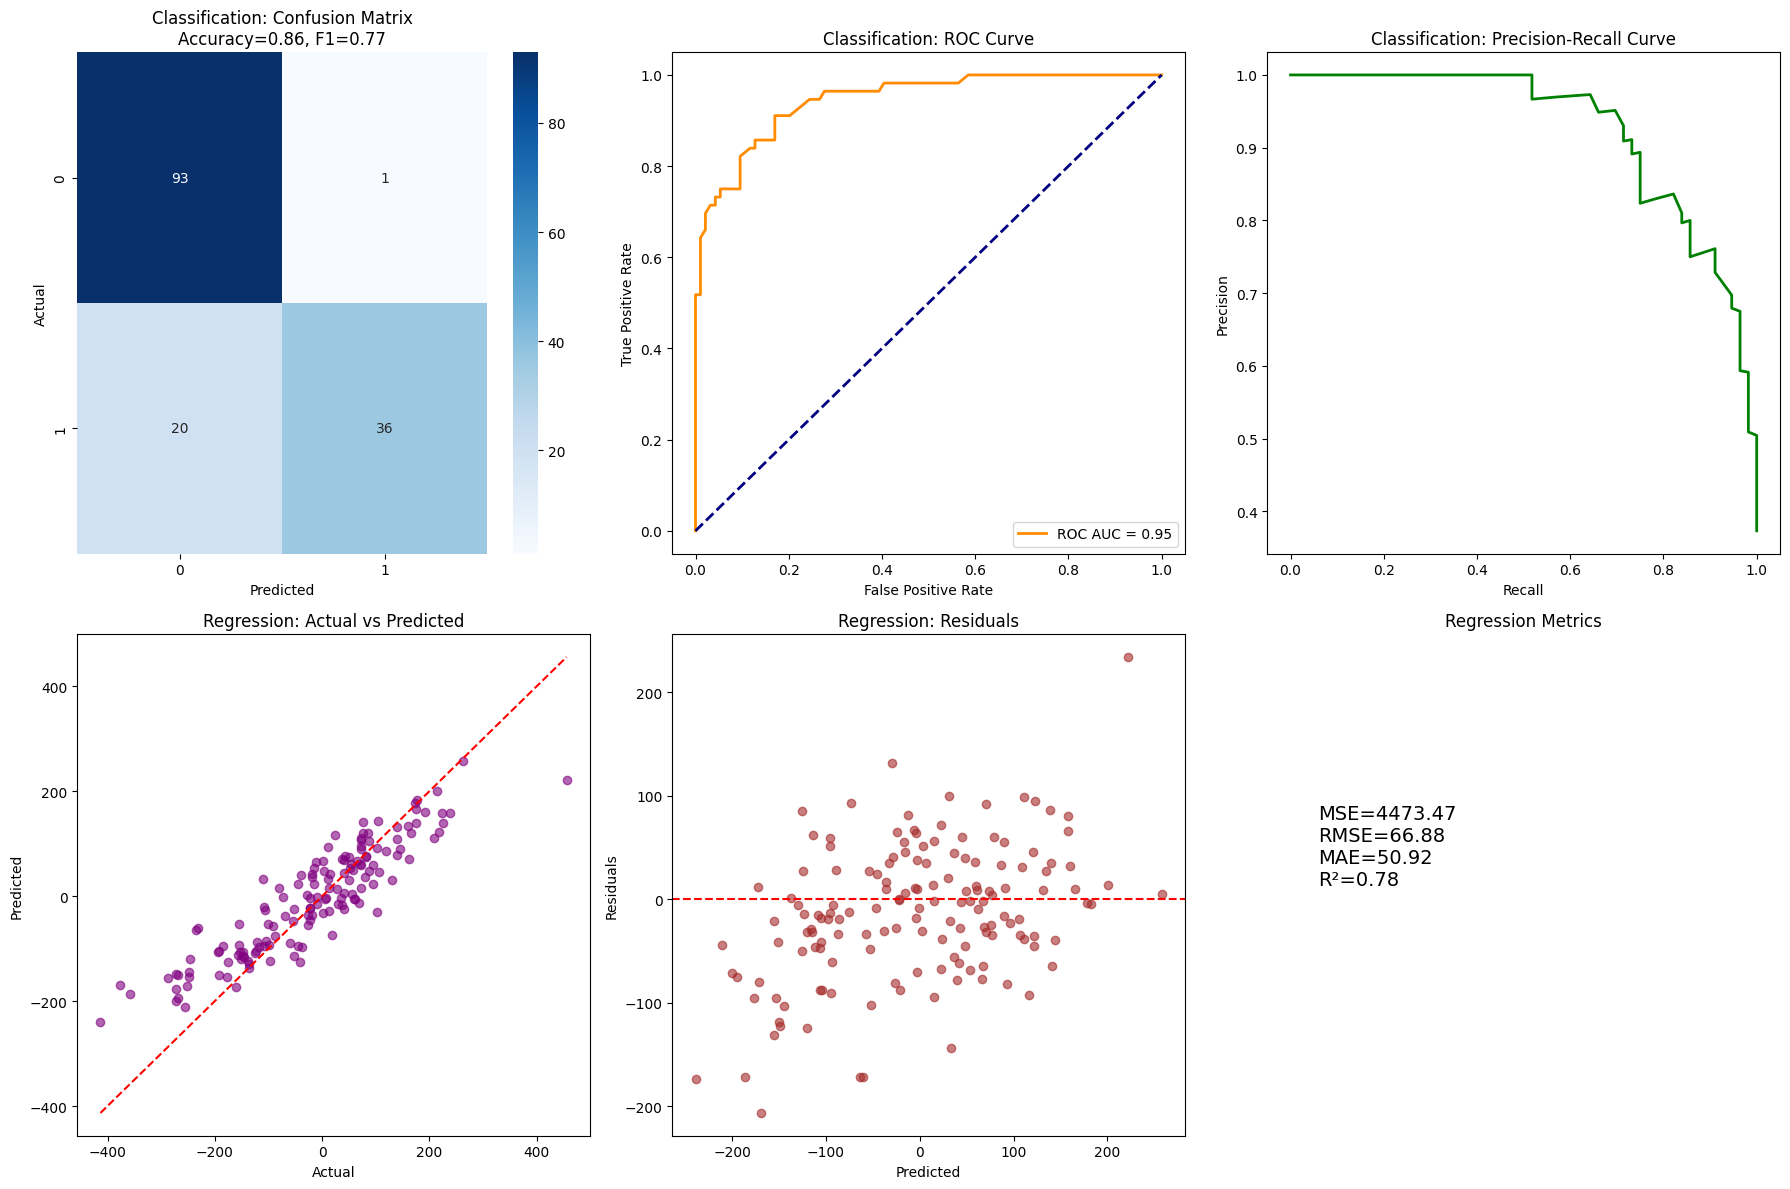

#**🌟 6. Xüsusiyyət Önəmi (Feature Importance)**

Random Forest yalnız güclü proqnozlar vermir, həm də **hansı xüsusiyyətlərin daha vacib olduğunu** öyrənməyə imkan yaradır.  
Bu, xüsusilə **model interpretasiyası** və **ölçülərin azaldılması** üçün çox faydalıdır.

## 6.1 Gini Importance (Mean Decrease in Impurity – MDI)

- **Tərif:** Hər xüsusiyyətin, ağacın qurulması zamanı **impurity** (qarışıqlıq, qeyri-saflıq) azalmasına nə qədər töhfə verdiyini ölçür.  
- **Prinsip:**  
  - Hər dəfə bir xüsusiyyət bölünmədə istifadə olunanda, impurity azalır.  
  - Bu azalmaların cəmi həmin xüsusiyyətin önəmini göstərir.  
- **Formul:**  
$$
Importance(feature_j) = \sum_{split \in j} \Delta Impurity(split)
$$
- **Üstünlüklər:** Hesablama çox sürətlidir.  
- **Məhdudiyyətlər:**  
  - Kateqorik xüsusiyyətlər çox dəyərə malikdirsə, şişirdilə bilər.  
  - Yalnız train setinə əsaslanır.

## 6.2 Permutation Importance (Mean Decrease in Accuracy – MDA)

- **Tərif:** Bir xüsusiyyətin dəyərləri qarışdırıldıqda (permute edildikdə) modelin dəqiqliyinin nə qədər düşdüyünə baxılır.  
- **Prinsip:**  
  - Əgər bir xüsusiyyət vacibdirsə → qarışdırıldıqda model performansı ciddi şəkildə pisləşir.  
  - Əgər vacib deyilsə → qarışdırmaq demək olar heç nəyi dəyişmir.  
- **Üstünlüklər:**  
  - Daha etibarlı, çünki təlim verilərindən deyil, **test verilərindən** istifadə olunur.  
  - Bütün model növlərinə tətbiq edilə bilər.  
- **Məhdudiyyətlər:**  
  - Hesablama MDI-yə görə daha yavaşdır (çoxlu permutasiya tələb edir).

## 6.3 Xüsusiyyət Önəmlərinin Şərhi və Vizuallaşdırılması

- **Şərh:**  
  - Yüksək dəyərli xüsusiyyətlər → modelin proqnozunda əsas rol oynayır.  
  - Aşağı dəyərli xüsusiyyətlər → çox az təsir göstərir, bəzən silinə bilər.  

- **Vizuallaşdırma üsulları:**  
  1. Bar chart → ənənəvi üsul.  
  2. Horizontal barplot → xüsusilə çox dəyişən olduqda oxunması asandır.  
  3. SHAP və ya LIME kimi texnikalar → hər bir fərdi proqnoz üçün də interpretasiya imkanı yaradır.  

📌 Adətən `sklearn`-də `feature_importances_` atributu ilə **MDI**, `permutation_importance` funksiyası ilə isə **MDA** hesablamaq mümkündür.  



📌 **Xülasə:**  
- **MDI (Mean Decrease in Impurity):** sürətli, amma bəzən yanıltıcı.  
- **MDA (Permutation Importance):** daha etibarlı, amma yavaşdır.  
- Vizualizasiyalar → xüsusiyyətlərin modeldəki rolunu anlamaq üçün çox vacibdir.  

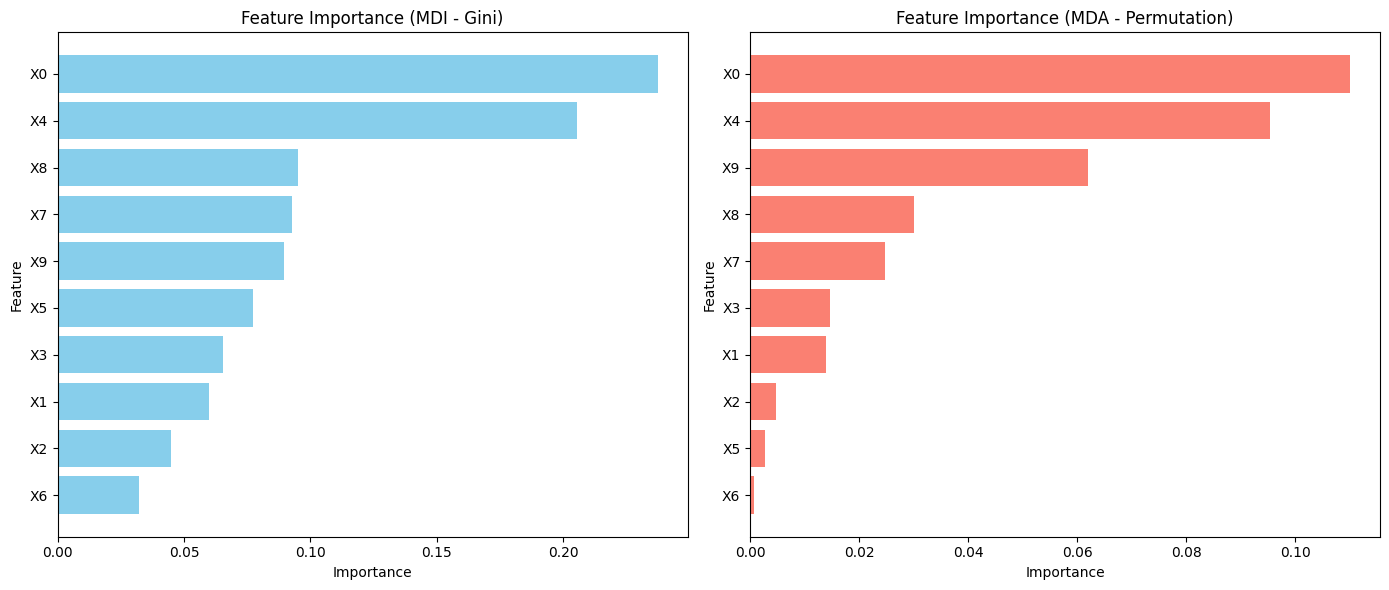

#**⚖️ 7. Üstünlüklər və Çatışmazlıqlar**

Random Forest çox güclü və çevik bir alqoritmdir.  
Amma hər alqoritm kimi, onun da həm üstünlükləri, həm də zəif tərəfləri var.

## 7.1 Üstünlüklər ✅

1. **Yüksək Doğruluq**
   - Çoxlu ağaclardan ibarət olduğuna görə tək bir qərar ağacına nisbətən daha dəqiq nəticələr verir.  
   - Səs çoxluğu (majority vote) və ya ortalama nəticə ilə səhvlər minimuma enir.  

2. **Overfitting-ə Dayanıqlılıq**
   - Tək ağaclar tez-tez overfit olur.  
   - Lakin Random Forest → bootstrap nümunələri və xüsusiyyətlərin təsadüfi seçilməsi sayəsində variasiyanı azaldır və overfitting riskini xeyli aşağı salır.  

3. **Çox Yönlülük (Versatility)**
   - Həm təsnifat (**classification**), həm də reqressiya (**regression**) problemlərində istifadə edilə bilər.  
   - Çox ölçülü (high-dimensional) datasetlərdə yaxşı işləyir.  
   - Outlier-lara və əskik dəyərlərə nisbətən dayanıqlıdır.  

4. **Xüsusiyyət Önəmi (Feature Importance)**
   - Model bizə hansı dəyişənlərin daha vacib olduğunu göstərir.  
   - Bu xüsusiyyət, data analizi və interpretasiya üçün böyük üstünlükdür.  

5. **OOB Error İmkanı**
   - Əlavə cross-validation etmədən daxili doğrulama imkanı verir.

## 7.2 Çatışmazlıqlar ❌

1. **Şərhin Zəifliyi**
   - Tək bir ağac vizual olaraq asanlıqla izah edilə bilər.  
   - Amma yüzlərlə ağacdan ibarət Random Forest → “qara qutu” (black box) modelinə çevrilir.  
   - Hər bir qərarın necə verildiyini anlamaq çətindir.  

2. **Yavaş Train və Proqnoz (Training/Prediction)**
   - Çoxlu ağac qurulduğu üçün training prosesi vaxt aparır.  
   - Xüsusilə böyük datasetlərdə və yüksək `n_estimators` dəyərlərində proqnoz da gec ola bilər.  

3. **Yüksək Yaddaş (Memory) İstifadəsi**
   - Onlarla və ya yüzlərlə ağac saxlanmalıdır.  
   - Bu, RAM istifadəsini artırır.  
   - Böyük verilənlər bazasında çox resurs tələb edə bilər.  

4. **Disbalanced Datasetlərdə Problem**
   - Datasetdə sinif balanssızdırsa (məsələn, 95% class 0, 5% class 1), model çox vaxt dominant sinifi proqnozlaşdırır.  
   - Bunun üçün əlavə üsullar (SMOTE, class_weight) tətbiq edilməlidir.  


📌 **Xülasə:**  
- Random Forest yüksək doğruluq və overfitting-ə qarşı dayanıqlılıq təmin edən çox güclü ensemble metodudur.  
- Amma çox böyük datasetlərdə hesablama baxımından effektiv deyil və interpretasiya baxımından çətinliklər yaradır.


#**🌍 8. İstifadə Sahələri**

Random Forest həm təsnifat, həm də reqressiya problemlərində çox yönlü və güclü alqoritmdir.  
Onun tətbiq sahələri müxtəlifdir və həm biznes, həm də elmi sahələrdə istifadə olunur.

## 8.1 Classification Problems

Random Forest təsnifat üçün ideal seçimdir, xüsusilə böyük və mürəkkəb datasetlərdə.  

**Məsələn:**
1. **Fraud Detection (Fırıldaqçılığın aşkarlanması)**  
   - Kredit kartı əməliyyatlarında şübhəli fəaliyyətləri tanımaq.  
   - Hər əməliyyat bir neçə xüsusiyyətlə təsnif edilir (məbləğ, vaxt, region, kart tarixi).  

2. **Tibb və Sağlamlıq Analizi**  
   - Xəstəlik diaqnozu: xəstənin simptomları və laboratoriya nəticələrinə əsasən doğru sinifi proqnozlaşdırmaq.  
   - Məsələn, xərçəngin növünü təsnif etmək.  

3. **Müştəri Analizi (Customer Analytics)**  
   - Müştərilərin məhsul və ya xidmətə reaksiyasını təsnif etmək.  
   - Hədəf reklamlar və marketinq strategiyaları üçün istifadə olunur.  

## 8.2 Regression Problems

Random Forest reqressiyada da güclü nəticələr verir.  

**Misal tətbiqlər:**
1. **Qiymət Təxminləri (Price Prediction)**  
   - Əmlak, avtomobil və digər məhsulların bazar qiymətlərini proqnozlaşdırmaq.  
   - Xüsusiyyətlər: m^2, yerləşmə, yaş, təchizat və s.  

2. **Risk Analizi (Risk Assessment)**  
   - Kredit riski, sığorta riski və digər maliyyə risklərini qiymətləndirmək.

## 8.3 Feature Selection & Dimensionality Reduction

- Random Forest-ın `feature_importances_` atributu, xüsusiyyət seçimində istifadə olunur.  
- Əhəmiyyətli xüsusiyyətləri seçərək modelin sadələşdirilməsi və hesablama sürətinin artırılması mümkündür.


## 8.4 Anomaly Detection

- Nadir halları və qeyri-adi nümunələri tapmaq üçün istifadə olunur.  
- Məsələn:  
  - Kredit kartı fırıldaqçılıqları  
  - Sistem və şəbəkə təhlükəsizliyi anomaliyaları  
  - İstehsal xətalarının aşkarlanması


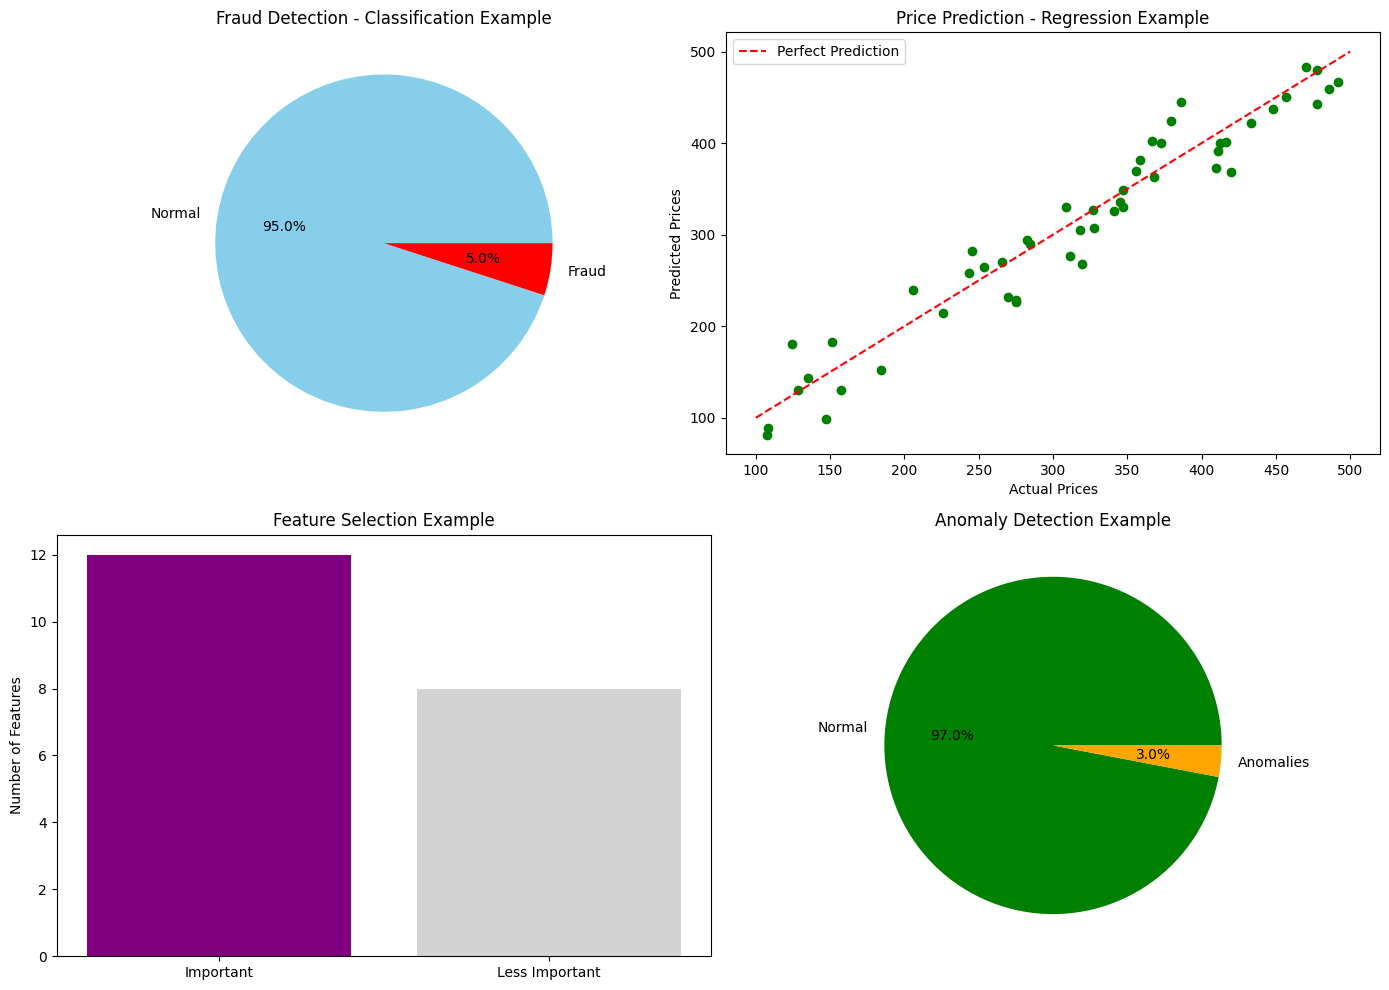

#**🖥️ 9. Random Forest-ın Praktik Tətbiqi**

Random Forest-ın gücü yalnız nəzəriyyədə deyil, həm də praktik tətbiqlərdə ortaya çıxır.

## 9.1 Scikit-learn ilə Random Forest Classifier / Regressor

- **Təsnifat (Classification):** `RandomForestClassifier`  
  - Məqsəd: Verilmiş xüsusiyyətlər əsasında nümunələri siniflərə ayırmaq.  
  - Çıxış: Hər nümunə üçün sinif proqnozu və ehtimal dəyərləri.  

- **Reqressiya (Regression):** `RandomForestRegressor`  
  - Məqsəd: Davranışı ədədi olaraq proqnozlaşdırmaq (qiymət, risk, temperatur və s.).  
  - Çıxış: Nümunələr üçün orta proqnoz və mümkün inam intervalları (confidence intervals).

## 9.2 Hiperparametr Optimizasiyası

- Random Forest-ın performansı **hiperparametrlərə** çox bağlıdır.  
- Əsas hiperparametrlər:  
  - `n_estimators` → ağac sayı  
  - `max_depth` → ağacın maksimum dərinliyi  
  - `min_samples_split` → bir düyümün bölünməsi üçün minimum nümunə  
  - `max_features` → hər düyümdə nəzərə alınan xüsusiyyət sayı  

- **Optimallaşdırma üsulları:**  
  1. **GridSearchCV**  
     - Əvvəlcədən təyin olunmuş hiperparametr dəyərləri üzərində exhaustiv axtarış aparır.  
     - Pros: Hər bir kombinasiyanı sınayır → ən optimal dəyərləri tapır.  
     - Cons: Hesablama baxımından baha başa gəlir.  
  2. **RandomizedSearchCV**  
     - Verilmiş dəyərlər aralığından təsadüfi nümunələr seçərək axtarır.  
     - Pros: Daha sürətli, böyük parametrlər məkanlarında uyğundur.  
  3. **Optuna və digər Bayesian optimizasiya üsulları**  
     - Parametrləri adaptiv şəkildə seçir.  
     - Daha az iterasiya ilə optimal nəticələr verir.

## 9.3 Pipeline İnteqrasiyası

- Pipeline-lar → **preprocessing**, **model qurma**, **evaluation** mərhələlərini birləşdirir.  
- Random Forest pipeline-larda rahat inteqrasiya olunur:  
  - Məsələn:  
    1. Missing value imputasiyası  
    2. One-hot encoding və ya scaling (əgər reqressiyada lazım olsa)  
    3. Random Forest Classifier / Regressor  
    4. Cross-validation / scoring  

- **Üstünlük:**  
  - Reproduktivlik  
  - Kodun sadəliyi və saxlanması  
  - Təkrar istifadə və eksperimentlərin avtomatlaşdırılması

## 9.4 Big Datada İstifadə

- Standart Scikit-learn implementasiyası RAM limitlərinə bağlıdır → çox böyük datasetlərdə yavaş ola bilər.  
- Big data üçün texnologiyalar:  
  1. **Spark MLlib** → parallel computing ilə Big Datada Random Forest trainingi.  
  2. **Dask-ML** → Scikit-learn API ilə inteqrasiya, paralel və paylanmış təlim.  
  3. **Hibrid yanaşmalar** → modelin bir hissəsi lokal, qalanı buludda və ya GPU-da train edilə bilər.  

- Məqsəd: **hesablama vaxtını azaltmaq, RAM istifadəsini idarə etmək və böyük verilənlərdə model qurmaq**.  


📌 **Xülasə:**  
- Random Forest-ı praktik layihələrdə qurmaq üçün:  
  - Scikit-learn ilə Classifier / Regressor  
  - Hiperparametr optimizasiyası → GridSearchCV, RandomizedSearchCV, Optuna  
  - Pipeline-larla tam inteqrasiya  
  - Böyük datasetlər üçün Spark və Dask kimi paylanmış texnologiyalardan istifadə  


#**🚀 10. Advanced Topics**

## 10.1 Balanced Random Forest (Disbalanced Datasetlər üçün)

- Problem: Sinif balanssızlığı (məsələn, 95% class 0, 5% class 1) modelin dominant sinifi öyrənməsinə səbəb olur.  
- Həll yolu: **Balanced Random Forest**  
  - Hər ağac üçün sinifləri balanslı nümunələrlə təlim edir.  
  - Minority sinif nümunələrini oversample və ya majority sinifdən təsadüfi nümunələri azaldaraq balans yaradır.  
- Nəticə: Disbalanced datasetlərdə daha doğru proqnozlar.

## 10.2 Extremely Randomized Trees (ExtraTrees) Fərqi

- ExtraTrees → Random Forest-ın bir variantıdır.  
- Əsas fərq:  
  1. Random Forest → hər düyümdə ən yaxşı split üçün optimal xüsusiyyət və bölünmə dəyəri seçir.  
  2. ExtraTrees → xüsusiyyət və split dəyəri təsadüfi seçilir → daha çox randomness → daha sürətli və bəzən daha yaxşı genelleme.  
- Pros: Daha az overfit, daha sürətli train.  
- Cons: Daha yüksək variance ola bilər bəzi datasetlərdə.

## 10.3 Random Forest vs XGBoost / LightGBM / CatBoost

- **Random Forest**:  
  - Bagging ensemble  
  - Ağaclar paralel qurulur  
  - Overfitting-ə qarşı dayanıqlı  

- **XGBoost / LightGBM / CatBoost**:  
  - Boosting ensemble  
  - Ağaclar ardıcıl qurulur (hər yeni ağac əvvəlki səhvləri düzəldir)  
  - Daha yüksək performans (tez-tez) amma overfitting riski daha yüksək  

- Müqayisə:  
  - Dataset kiçik və sadədirsə → Random Forest daha sadə və sürətlidir  
  - Dataset böyük və mürəkkəbdirsə → Boosting metodları daha yaxşı performans verə bilər

## 10.4 OOB vs Cross-validation

- **OOB (Out-of-Bag) Error**  
  - Hər ağac bootstrap nümunələr üzərində train olunur  
  - Training zamanı istifadə olunmayan nümunələr → test kimi istifadə edilir  
  - Pros: Daxili validation, əlavə cross-validation lazım deyil  

- **Cross-validation (CV)**  
  - Dataset k-fold bölünərək train və test mərhələləri təkrarlanır  
  - Pros: Daha stabil və geniş qiymətləndirmə verir  
  - OOB və CV arasında nəticələr adətən oxşardır, amma CV daha çox resurs tələb edir

## 10.5 Parallelization və Performans Optimizasiyası

- Random Forest **ağaclar paralel qurulduğu üçün** multi-core CPU-dan effektiv istifadə edir  
- Parametrlər:  
  - `n_jobs=-1` → bütün mövcud CPU-lardan istifadə  
  - `max_features` → daha az xüsusiyyət seçərək təlimi sürətləndirmək  
  - `n_estimators` → balanslı şəkildə artırmaq, çox yüksək sayda ağac RAM-i yükləyə bilər  
- Böyük datasetlər üçün:  
  - Dask, Spark MLlib və GPU implementasiyaları  
  - Hibrid yanaşmalar → yaddaş və sürət optimizasiyası  


📌 **Xülasə:**  
- Disbalanced datasetlər → Balanced Random Forest  
- Sürətli variant → ExtraTrees  
- Daha performanslı boosting → XGBoost / LightGBM / CatBoost  
- Validation → OOB və ya CV  
- Performans → paralellization, optimallaşdırılmış hiperparametrlər, paylanmış hesablama  


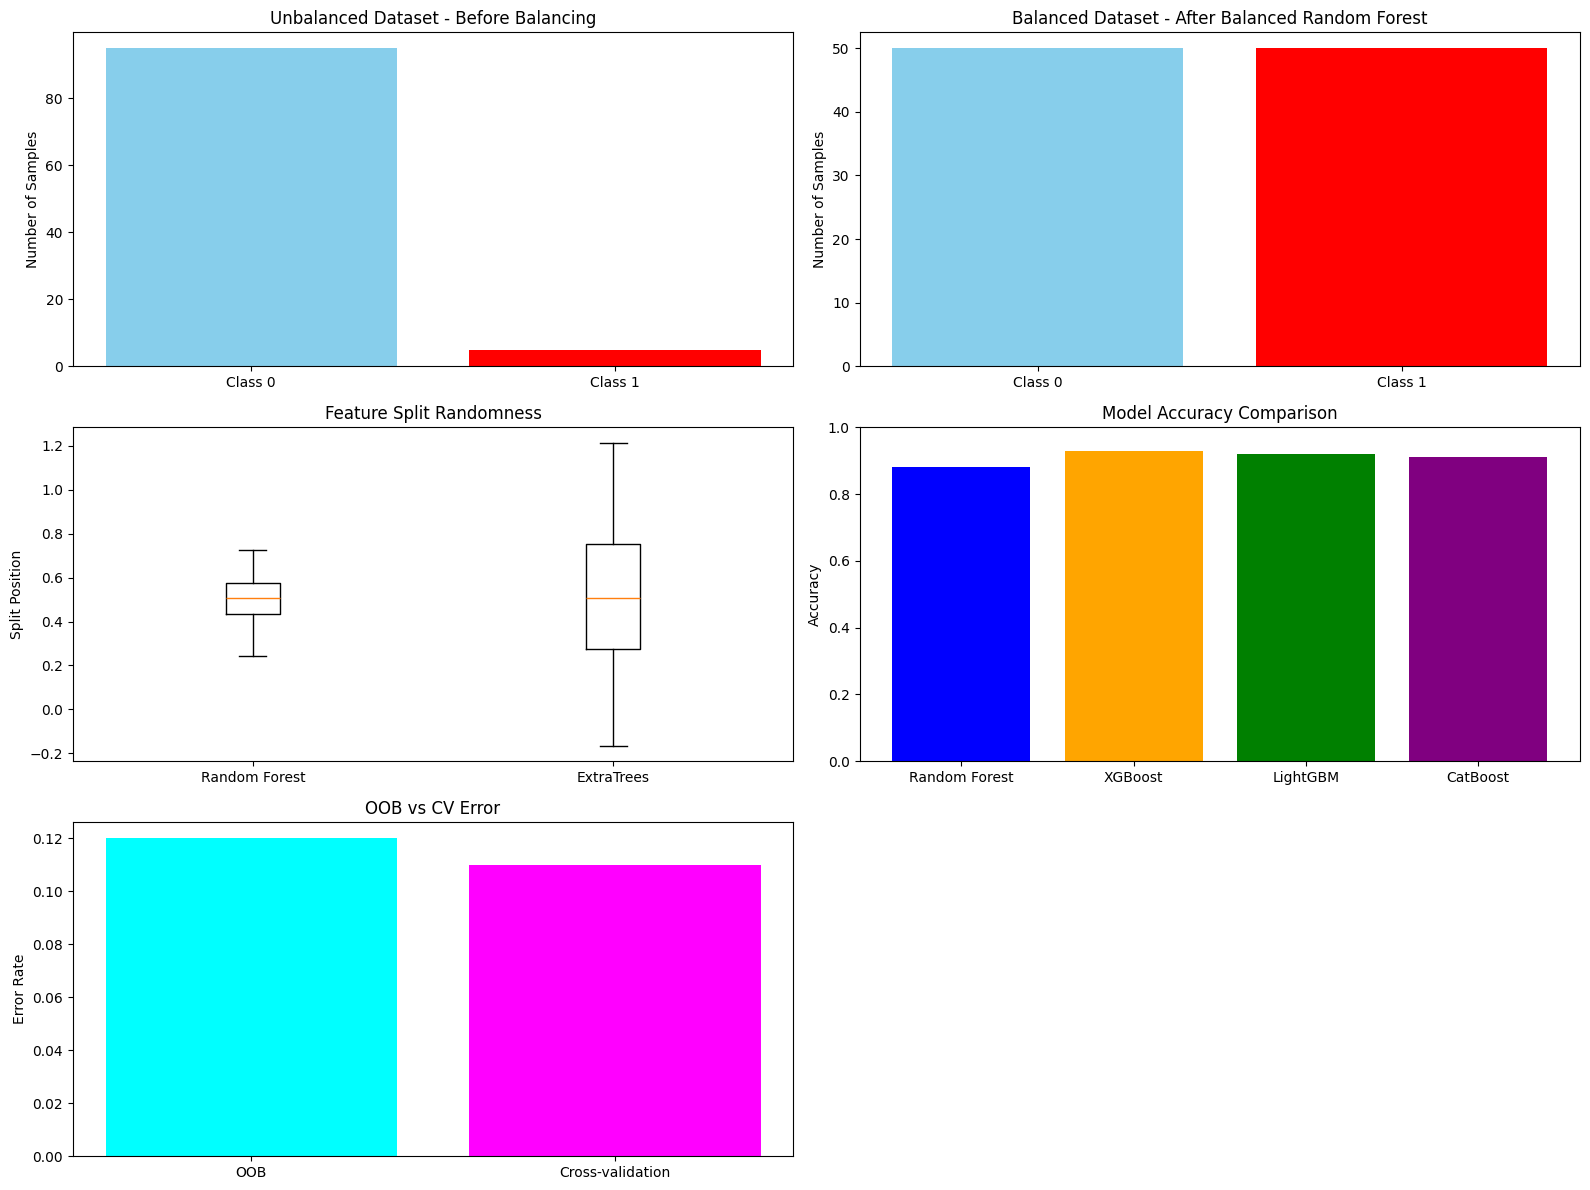

#**🔍 11. Explainability**

Random Forest yüksək performanslı olsa da, **“black-box” model** kimi tanınır.  
Bu bölmədə modelin nəticələrini necə anlamaq və interpretasiya etmək mövzularını öyrənəcəyik.

## 11.1 SHAP Dəyərləri

- **SHAP (SHapley Additive exPlanations)** → hər xüsusiyyətin model proqnozuna nə qədər təsir etdiyini göstərir.  
- Məntiq: Hər nümunə üçün xüsusiyyətlərin marginal təsirlərini ədalətli şəkildə bölüşdürmək.  
- Faydaları:  
  - Hər xüsusiyyətin müsbət və ya mənfi təsirini görə bilmək  
  - Individual proqnozların izahı  
  - Qlobal feature importance ilə müqayisə etmək  
- Nəticə: SHAP modelin qərarlarını “açır” və istifadəçiyə başa düşülən şəkildə göstərir.

## 11.2 Partial Dependence Plots (PDP)

- PDP → müəyyən xüsusiyyətlərin proqnoz üzərində orta təsirini vizuallaşdırır.  
- Məntiq:  
  1. Bir və ya bir neçə xüsusiyyəti sabit saxlayaraq  
  2. Digər xüsusiyyətləri datasetdə dəyişdirərək model proqnozlarını hesablamaq  
  3. Ortalama nəticəni qrafikdə göstərmək  
- Faydaları:  
  - Xüsusiyyətlərin model davranışına necə təsir etdiyini görmək  
  - Linearlıq və ya non-linearlıq trendini analiz etmək

## 11.3 Feature Interaction Analizi

- Random Forest-ın güclü tərəfi → **xüsusiyyətlərin qarşılıqlı təsirini** təbii şəkildə öyrənmək.  
- Yanaşmalar:  
  - **Two-way PDP** → iki xüsusiyyətin birlikdə proqnoza təsirini görmək  
  - **SHAP interaction values** → xüsusiyyətlərin qarşılıqlı təsir paylarını göstərmək  
- Məqsəd: Modelin qərar mexanizmini daha dərindən anlamaq və xüsusiyyətlər arasındakı kompleks əlaqələri aşkar etmək.  


📌 **Xülasə:**  
Random Forest kimi “black-box” modellərin interpretasiyası üçün:  
- **SHAP** → individual və qlobal izah  
- **PDP** → xüsusiyyətlərin orta təsiri  
- **Feature interaction** → xüsusiyyətlərin bir-birinə təsiri  
- Nəticə → modellərin daha etibarlı, şəffaf və istifadəçi tərəfindən başa düşülən olması


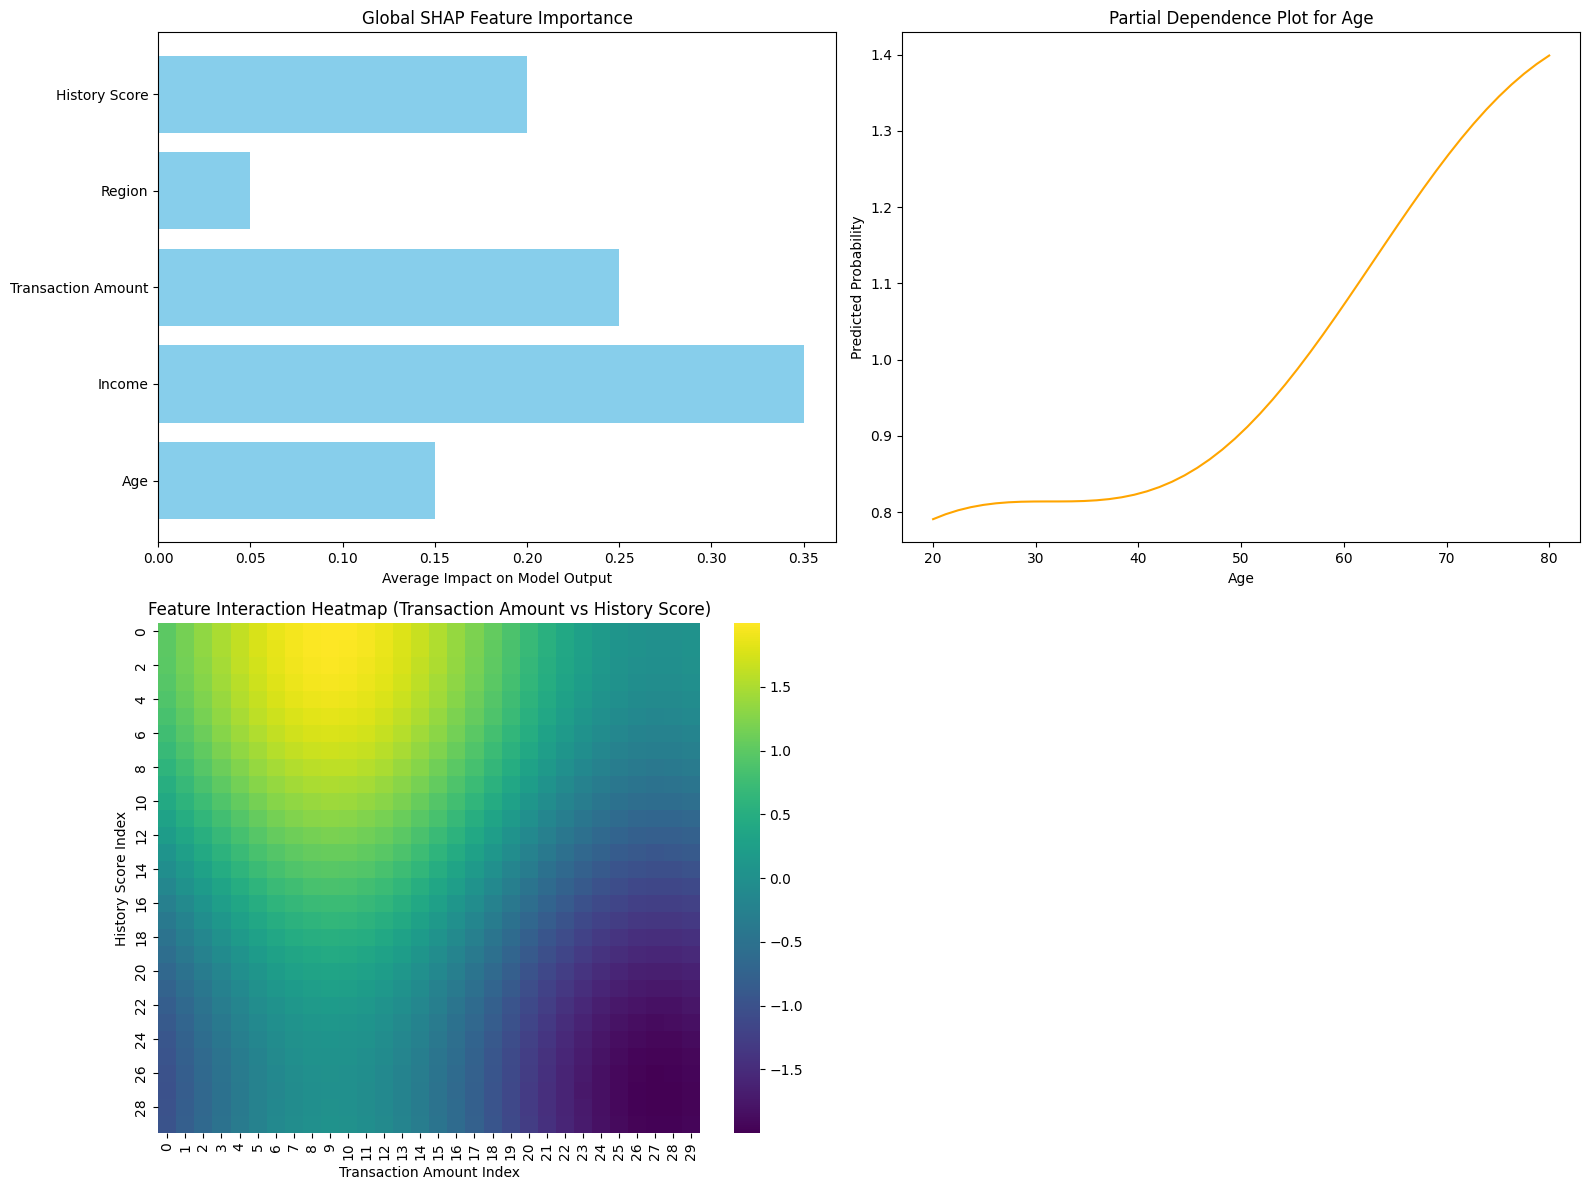